In [2]:
import pandas as pd

df = pd.read_csv('c:/data/Data/ozone/ozone2.csv')

df.head()

,Solar.R,Wind,Temp,Ozone,Result
0,190.000000,7.4,67,67,0
1,118.000000,8.0,72,72,0
2,149.000000,12.6,74,74,0
3,313.000000,11.5,62,62,0
4,185.931507,14.3,56,56,0


In [3]:
df.columns

Index(['Solar.R', 'Wind', 'Temp', 'Ozone', 'Result'], dtype='object')

In [4]:
df.shape

(153, 5)

In [5]:
df.describe()

,Solar.R,Wind,Temp,Ozone,Result
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,185.931507,9.957516,77.882353,77.882353,0.555556
std,87.960267,3.523001,9.465270,9.465270,0.498536
min,7.000000,1.700000,56.000000,56.000000,0.000000
25%,120.000000,7.400000,72.000000,72.000000,0.000000
50%,194.000000,9.700000,79.000000,79.000000,1.000000
75%,256.000000,11.500000,85.000000,85.000000,1.000000
max,334.000000,20.700000,97.000000,97.000000,1.000000


In [7]:
#오존량 분류를 기준으로 한 평균값들
df.groupby('Result').mean()

,Solar.R,Wind,Temp,Ozone
Result,,,,
0,180.467566,11.082353,71.367647,71.367647
1,190.302659,9.057647,83.094118,83.094118


In [8]:
df['Result'].value_counts()

1    85
0    68
Name: Result, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

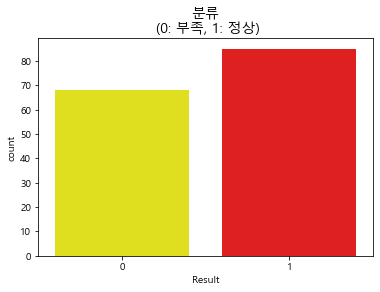

In [9]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager. FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

colors = ['yellow', 'red']

sns.countplot('Result', data=df, palette=colors)
plt.title('분류\n (0: 부족, 1: 정상)', fontsize=14)

In [12]:
cols = ['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['Result']

array([[<AxesSubplot:xlabel='Solar.R', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Wind', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Temp', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Ozone', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Result', ylabel='Solar.R'>],
       [<AxesSubplot:xlabel='Solar.R', ylabel='Wind'>,
        <AxesSubplot:xlabel='Wind', ylabel='Wind'>,
        <AxesSubplot:xlabel='Temp', ylabel='Wind'>,
        <AxesSubplot:xlabel='Ozone', ylabel='Wind'>,
        <AxesSubplot:xlabel='Result', ylabel='Wind'>],
       [<AxesSubplot:xlabel='Solar.R', ylabel='Temp'>,
        <AxesSubplot:xlabel='Wind', ylabel='Temp'>,
        <AxesSubplot:xlabel='Temp', ylabel='Temp'>,
        <AxesSubplot:xlabel='Ozone', ylabel='Temp'>,
        <AxesSubplot:xlabel='Result', ylabel='Temp'>],
       [<AxesSubplot:xlabel='Solar.R', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Wind', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Temp', ylabel='Ozone'>,
        <AxesSubplot:x

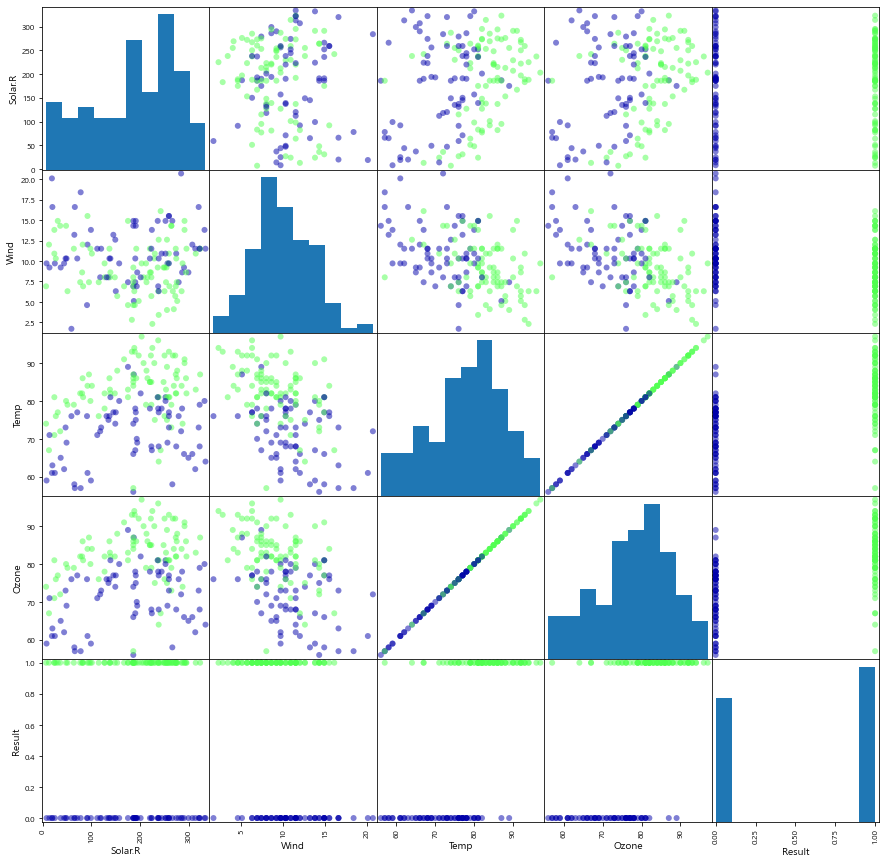

In [14]:
import mglearn

#산점도 행렬 출력
pd.plotting.scatter_matrix(df, c=y, figsize=(15,15), marker='o', cmap=mglearn.cm3)

In [15]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Result'])
df_samp = pd.concat([X_samp, y_samp], axis=1)

In [16]:
#오버샘플링
from imblearn.over_sampling import SMOTE
X_sample, y_sample = SMOTE(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Result'])
df_samp = pd.concat([X_samp, y_samp], axis=1)

In [17]:
df_samp['Result'].value_counts()

0    85
1    85
Name: Result, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

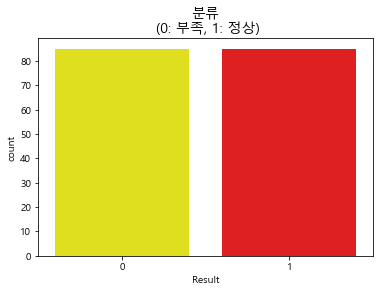

In [18]:
colors = ['yellow', 'red']

sns.countplot('Result', data=df_samp, palette=colors)
plt.title('분류\n (0: 부족, 1: 정상)', fontsize=14)

In [19]:
cols = ['Solar.R', 'Wind', 'Temp']
X = X_samp[cols]
y = y_samp['Result']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [23]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=42, max_iter=5000)
model.fit(X_train, y_train)

MLPClassifier(max_iter=5000, random_state=42)

In [24]:
import numpy as np

pred = model.predict(X_test)
print('train:', model.score(X_train, y_train))
print('test:', model.score(X_test, y_test))
print('test:', np.mean(pred == y_test))

train: 0.8602941176470589
test: 0.6176470588235294
test: 0.6176470588235294


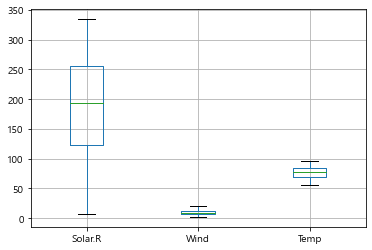

In [25]:
X_train.boxplot()
plt.show()

In [26]:
#Normalization 정규화

min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)
X_train_scaled = (X_train - min_on_training) / range_on_training
X_test_scaled = (X_test - min_on_training) / range_on_training

print('특별성 최소값\n{0}'.format(X_train_scaled.min(axis=0)))
print('특별성 최대값\n{0}'.format(X_train_scaled.max(axis=0)))

특별성 최소값
Solar.R    0.0
Wind       0.0
Temp       0.0
dtype: float64
특별성 최대값
Solar.R    1.0
Wind       1.0
Temp       1.0
dtype: float64


In [27]:
#Standardization 표준화

mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

print(X_train_scaled.describe())
print(X_test_scaled.describe())

            Solar.R          Wind          Temp
count  1.360000e+02  1.360000e+02  1.360000e+02
mean   7.074611e-16  7.473597e-16  6.840933e-16
std    1.000000e+00  1.000000e+00  1.000000e+00
min   -2.093962e+00 -2.215235e+00 -2.116711e+00
25%   -7.305668e-01 -7.542902e-01 -8.068246e-01
50%    9.338356e-02 -9.543299e-02  1.000196e-01
75%    8.146142e-01  7.353001e-01  7.045824e-01
max    1.741136e+00  2.883748e+00  1.913708e+00
         Solar.R       Wind       Temp
count  34.000000  34.000000  34.000000
mean   -0.238039   0.135460   0.094092
std     1.096705   1.087924   0.837876
min    -2.082234  -2.387110  -2.015950
25%    -0.976858  -0.582414  -0.277832
50%    -0.213578   0.076443   0.100020
75%     0.662148   0.420194   0.503061
max     1.576943   3.055623   2.014468


C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


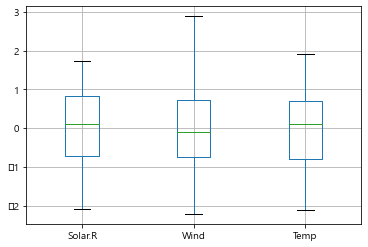

In [28]:
X_train_scaled.boxplot()
plt.show()

In [29]:
#표준화된 데이터로 다시 훈련
model = MLPClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [31]:
print('train:', model.score(X_train_scaled, y_train))
print('test:', model.score(X_test_scaled, y_test))
#예측률이 향상됨

train: 0.8455882352941176
test: 0.8823529411764706


In [32]:
#confusion matrix(오분류표)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
cm

array([[13,  5],
       [ 8,  8]], dtype=int64)

In [33]:
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

df_cm

,0,1
0,13,5
1,8,8


<AxesSubplot:title={'center':'confusion_matrix'}>

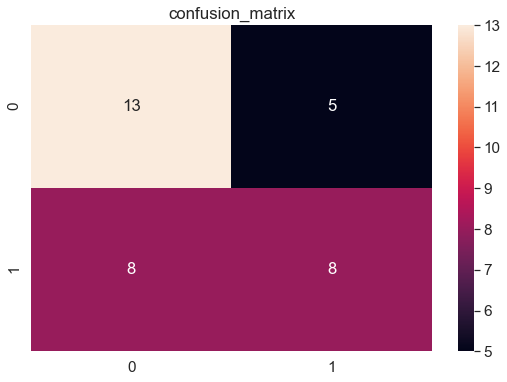

In [35]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title('confusion_matrix')
sns.heatmap(df_cm, annot=True)